In [77]:
import sympy as sym

In [78]:
c, a, wealth, utility = sym.symbols("c a w u", real=True, positive=True)
CRRA, WealthShare, WealthShift = sym.symbols(
    "sigma delta  \\underline{a}", real=True, positive=True
)
vp_a = sym.symbols("v_a", real=True, positive=True)

In [79]:
w = a + WealthShift
w

\underline{a} + a

In [80]:
u = (c ** (1 - WealthShare) * w**WealthShare) ** (1 - CRRA) / (1 - CRRA)
u

(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(1 - sigma)

In [81]:
u_alt = u.replace(w, wealth)
u_alt

(c**(1 - delta)*w**delta)**(1 - sigma)/(1 - sigma)

In [82]:
dudc = sym.diff(u, c)
dudc.simplify().replace(w, wealth).cancel().simplify()

c**(delta*sigma - delta - sigma)*w**(delta*(1 - sigma))*(1 - delta)

In [83]:
dudw = u.replace(w, wealth).diff(wealth)
dudw.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma + 1)*delta*w**(delta*(1 - sigma) - 1)

In [84]:
duda = sym.diff(u, a)
duda.replace(w, wealth).simplify().cancel().simplify()

c**(delta*sigma - delta - sigma + 1)*delta*w**(delta*(1 - sigma) - 1)

In [85]:
dudcdc = sym.diff(dudc.replace(w, wealth), c)
dudcdc.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma - 1)*w**(delta*(1 - sigma))*(-delta**2*sigma + delta**2 + 2*delta*sigma - delta - sigma)

In [86]:
dudadc = sym.diff(duda.replace(w, wealth), c)
dudadc.simplify().cancel().simplify()

c**(delta*sigma - delta - sigma)*delta*w**(delta*(1 - sigma) - 1)*(delta*sigma - delta - sigma + 1)

In [87]:
euler = dudc - duda
euler

-c**(1 - delta)*c**(delta - 1)*delta*(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)/(\underline{a} + a) + c**(1 - delta)*c**(delta - 1)*(c**(1 - delta)*(\underline{a} + a)**delta)**(1 - sigma)*(1 - delta)/c

In [88]:
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType
from HARK.ConsumptionSaving.ConsWealthPortfolioModel import WealthPortfolioConsumerType
from HARK.utilities import plot_funcs

In [89]:
cycles = 180
port_agent = PortfolioConsumerType(cycles=cycles)
wealth_agent = WealthPortfolioConsumerType(
    cycles=cycles, WealthShare=0.2, WealthShift=1.0
)

In [90]:
port_agent.solve()
# port_agent.completed_cycles

In [91]:
wealth_agent.solve()
# wealth_agent.completed_cycles

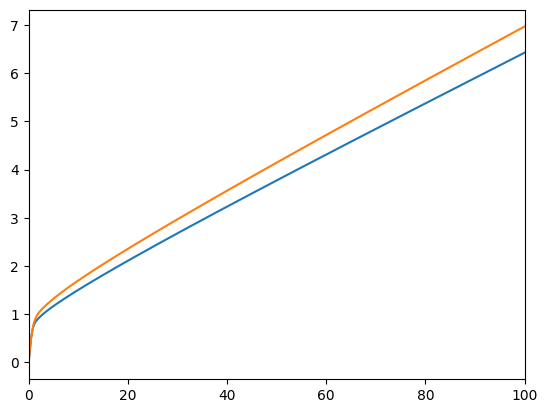

In [92]:
plot_funcs([wealth_agent.solution[0].cFuncAdj, port_agent.solution[0].cFuncAdj], 0, 100)

In [93]:
wealth_agent.solution[0].cFuncAdj.y_list

array([0.        , 0.50802158, 0.50986962, 0.55083812, 0.58895628,
       0.62387087, 0.65524155, 0.68329296, 0.70731771, 0.72732658,
       0.74336531, 0.75656625, 0.76821652, 0.77862984, 0.78827775,
       0.79742725, 0.80610132, 0.81430549, 0.82204986, 0.82943025,
       0.83646188, 0.84322908, 0.84974741, 0.8560172 , 0.86211618,
       0.86809322, 0.87395424, 0.87971701, 0.88542644, 0.89109836,
       0.89673592, 0.90235965, 0.90798617, 0.91362123, 0.91926732,
       0.92494171, 0.93065128, 0.93640066, 0.9421877 , 0.94801711,
       0.95390223, 0.95984553, 0.96585075, 0.97191699, 0.97805321,
       0.98426009, 0.99054181, 0.99690169, 1.00333718, 1.00985535,
       1.01645967, 1.02315208, 1.0299349 , 1.03680528, 1.04376856,
       1.050829  , 1.05798877, 1.06525012, 1.07261567, 1.08008505,
       1.08766085, 1.09534699, 1.10314561, 1.11106042, 1.11909575,
       1.12719586, 1.13541316, 1.14376201, 1.15224514, 1.16086355,
       1.1696255 , 1.17853258, 1.18758595, 1.1967936 , 1.20615

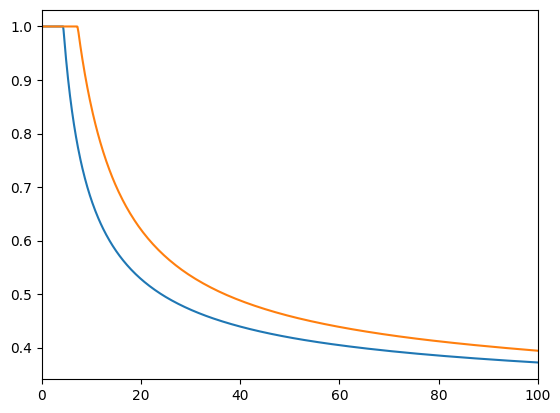

In [94]:
plot_funcs(
    [wealth_agent.solution[0].ShareFuncAdj, port_agent.solution[0].ShareFuncAdj], 0, 100
)

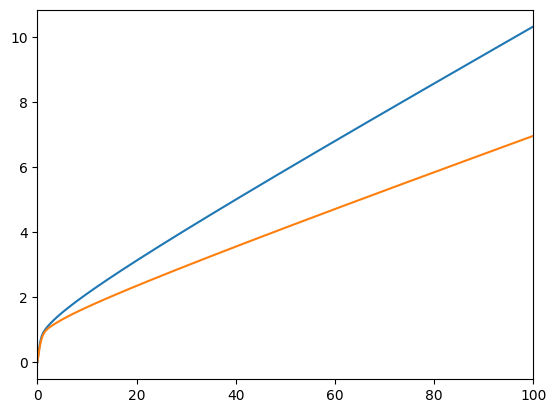

In [95]:
plot_funcs(
    [wealth_agent.solution[0].vPfuncAdj.cFunc, port_agent.solution[0].vPfuncAdj.cFunc],
    0,
    100,
)